# Sparse Hebbian Learning: toward a quantitative measure of the quality of filters

We are interested here in learning the "optimal" components of a set of images (let's say some "natural", usual images). As there is no supervisor to guide the learning, this is called unsupervised learning. Our basic hypothesis to find the best ("optimal") components will be to assume that *a priori* the most sparse is more plausible. We will implement the derived algorithm in this set of scripts.



In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import pandas as pd

## experiments

To test and control for the role of different parameters, we will have a first object (in the [shl_experiments.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_experiments.py) script) that controls a learning experiment. It contains all relevant parameters, but can also keep a trace of the history of some statistics. This is useful to compare the relative efficiency of the different solutions.


In [3]:
do_random = True # draw new coeff at random
do_random = False # draw new coeff with bootstrap resampling?

do_high = False # do a surrogate with all coeffs
do_high = True # do a surrogate with the higher coeffs

do_double_shuffle = True # shuffle accross dictionary elements
do_double_shuffle = False # only shuffles with each sample 

In [4]:
tag = 'coding'
homeo_methods = ['None', 'HAP', 'HEH']

record_num_batches = 2**12

seed = 42
np.random.seed(seed)

from shl_scripts.shl_experiments import SHL
shl = SHL()
data = shl.get_data(matname=tag + '_test')
indx = np.random.permutation(data.shape[0])[:record_num_batches]

list_figures = []

dico = {}
for homeo_method in homeo_methods:
    print(15*'🐶' + homeo_method[:3] + 15*'🐶')
    shl = SHL(homeo_method=homeo_method)
    dico[homeo_method] = shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method)


🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶Non🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HAP🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HEH🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶


## coding

The learning itself is done via a gradient descent but is highly dependent on the coding / decoding algorithm. This belongs to a another function (in the [shl_encode.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_encode.py) script)

🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶Non🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.01967008133688011
average std of codewords =  0.1414013416249936
l0-sparseness of codewords =  0.028379548433956917
std of the average of individual patches =  0.007602607767224526


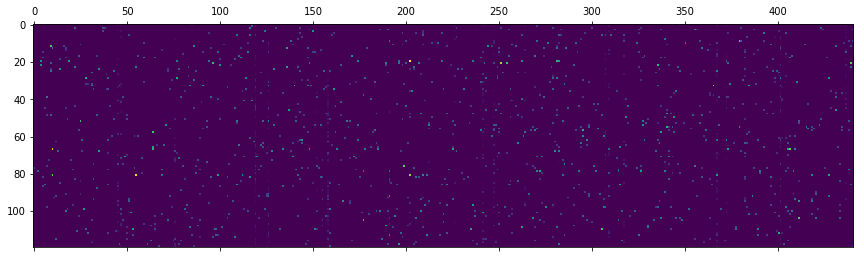

<Figure size 1080x216 with 0 Axes>

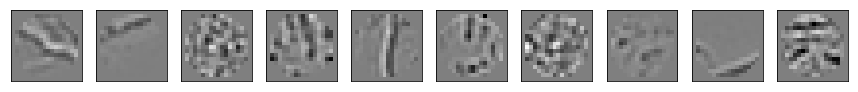

number of codes, size of reconstructed images =  (4096, 324)


<Figure size 1080x216 with 0 Axes>

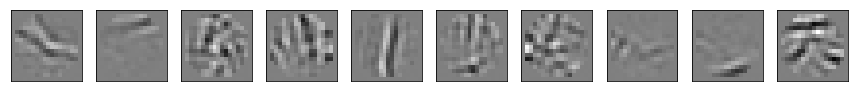

<Figure size 1080x216 with 0 Axes>

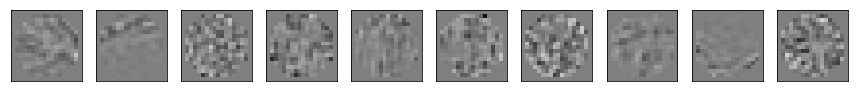

average of data patches =  -0.000120224792836511 +/- 0.005833718807624337
average of residual patches =  5.782682382496774e-05 +/- 0.004884555786425859
median energy of data =  0.18799682320600752
average energy of data =  0.1886447531819535 +/- 0.07023119141832547
average error =  5.782682382496774e-05 +/- 0.11337288334347335
average energy of residual =  0.10725700590554733 +/- 0.03673348208013711
median energy of residual =  0.10557337785889631
average gain of coding =  1.7588502172934646 +/- 0.30370874587377145
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HAP🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.021084302892443122
average std of codewords =  0.14391195986883587
l0-sparseness of codewords =  0.02937161192602041
std of the average of individual patches =  0.0035408738277622944


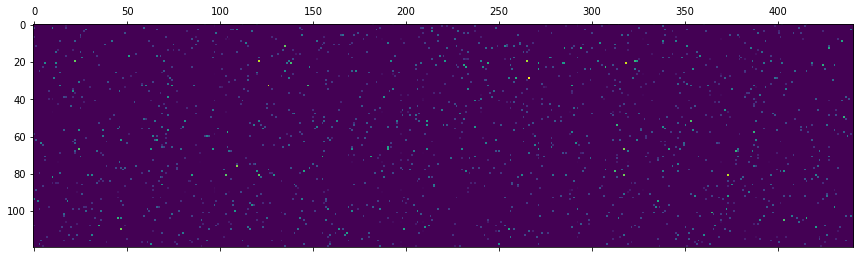

<Figure size 1080x216 with 0 Axes>

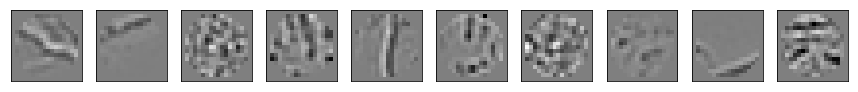

number of codes, size of reconstructed images =  (4096, 324)


<Figure size 1080x216 with 0 Axes>

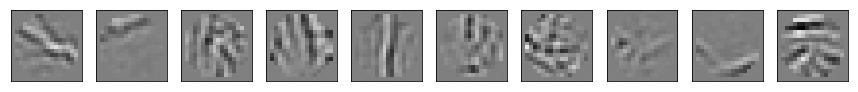

<Figure size 1080x216 with 0 Axes>

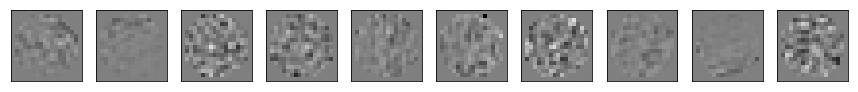

average of data patches =  -0.000120224792836511 +/- 0.005833718807624337
average of residual patches =  4.701657631684777e-05 +/- 0.004813593665684023
median energy of data =  0.18799682320600752
average energy of data =  0.1886447531819535 +/- 0.07023119141832547
average error =  4.701657631684777e-05 +/- 0.1085430376151052
average energy of residual =  0.10069656711629246 +/- 0.04051906460256202
median energy of residual =  0.09939511536599788
average gain of coding =  1.926648683528911 +/- 0.3577213781193063
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HEH🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.02113492151803212
average std of codewords =  0.14409595905883749
l0-sparseness of codewords =  0.029409810799319726
std of the average of individual patches =  0.0023942679020657713


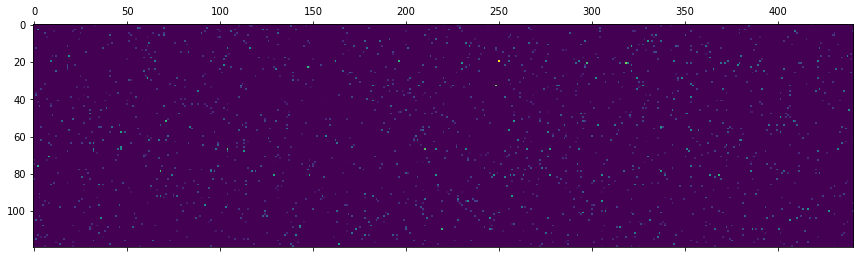

<Figure size 1080x216 with 0 Axes>

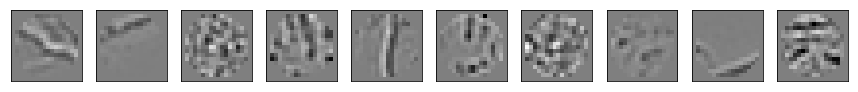

number of codes, size of reconstructed images =  (4096, 324)


<Figure size 1080x216 with 0 Axes>

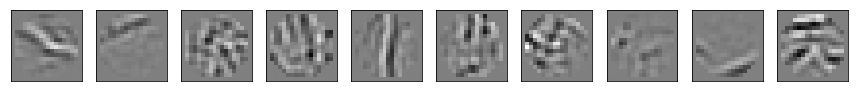

<Figure size 1080x216 with 0 Axes>

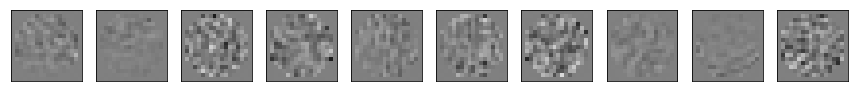

average of data patches =  -0.000120224792836511 +/- 0.005833718807624337
average of residual patches =  -0.0001729096749922639 +/- 0.004850057569602182
median energy of data =  0.18799682320600752
average energy of data =  0.1886447531819535 +/- 0.07023119141832547
average error =  -0.0001729096749922639 +/- 0.10827374332027148
average energy of residual =  0.10029209068594609 +/- 0.040801102144203204
median energy of residual =  0.09935730933319142
average gain of coding =  1.9427353943106112 +/- 0.3686666362560544


In [5]:
from shl_scripts.shl_encode import sparse_encode
stick = np.arange(shl.n_dictionary)*shl.nb_quant
P_cum_zeroeffect = np.linspace(0, 1, shl.nb_quant, endpoint=True)[np.newaxis, :] * np.ones((shl.n_dictionary, 1))

for homeo_method in homeo_methods:
    print(15*'🐶' + homeo_method[:3] + 15*'🐶')

    shl = SHL(homeo_method=homeo_method)
    sparse_code = sparse_encode(data[indx, :], dico[homeo_method].dictionary, P_cum=dico[homeo_method].P_cum, C=shl.C, 
                                     l0_sparseness=shl.l0_sparseness, gain=None)   

    from shl_scripts.shl_tools import print_stats
    SD, SE = print_stats(data[indx, :], dico[homeo_method].dictionary, sparse_code)

## Generating new coefficients by shuffling and decoding

🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶  None  🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
sparse_code_bar


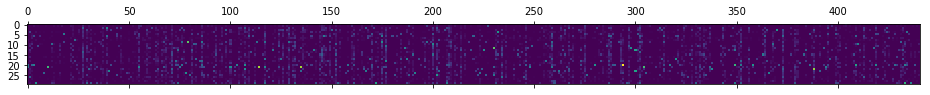

sparse_code_bar_high


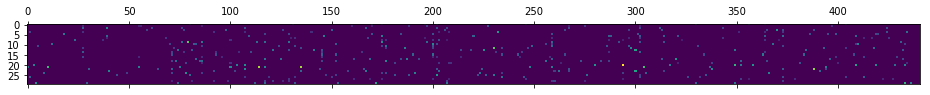

bar: average non-zeros [ 478 2541 2108  328  479  280  503  328  376  291  307  392 1925 1065
  236  428 2018  354  527  346  224 2022 1659  425  784 1711  344 3898
  322 2774]
bar_high: average non-zeros [ 59 145 100  55  67  61  61  50  61  51  58  66  84  61  64  66 137  58
  73  57  65  93  88  88  71  75  47 880  77 151]
rec: average non-zeros [ 52  99  82  48  64  53  53  52  57  50  51  57  91  51  56  53  92  55
  61  53  56  78  72  78  67 108  62 496  54 113]


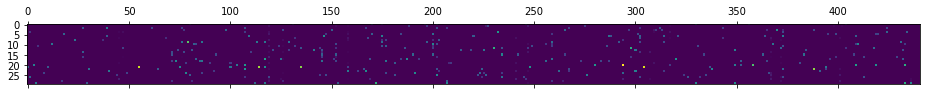

<Figure size 1080x216 with 0 Axes>

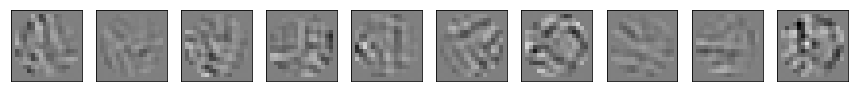

<Figure size 1080x216 with 0 Axes>

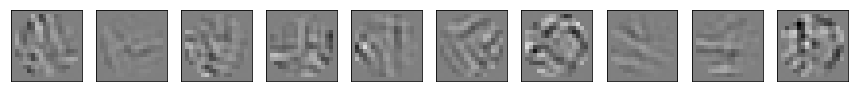

<Figure size 1080x216 with 0 Axes>

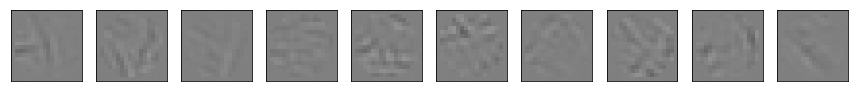

mean deviation of coefficients =  0.07309539670790563 0.02517107215155631 0.02208842017032922
mean deviation of coefficient errors =  0.008552720193872097
mean deviation of quantiles =  0.0031382937060750286
mean deviation of quantiles =  0.0030592955257209946
total deviation of quantiles =  0.0014630226916567237
ratio deviation of quantiles =  0.4661841206336557
proba incorrect coefficients =  0.2790388942035147
proba incorrect coefficients (high) =  0.013197987528344668
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶  HAP  🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
sparse_code_bar


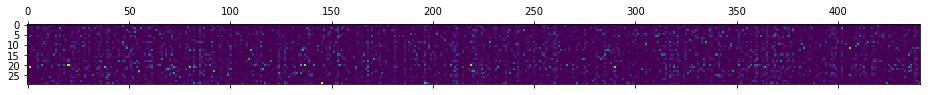

sparse_code_bar_high


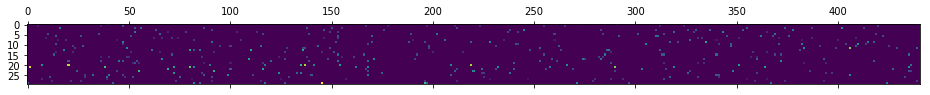

bar: average non-zeros [ 370  552 1457  655 1324 2008  678 1959 2505 2190 2010  797  939  752
 2330 1065 3233 1239 2436  439 1052 2167 2599 2169 2443 2862  567  541
 2696  542]
bar_high: average non-zeros [ 75  81 111  53  93 123  98 125 179 126 119 104  82  78 126  87 257 141
 144  89  74 119 157 139 145 161  72  67 217  86]
rec: average non-zeros [ 70  78 114  58  94 112 102 118 181 125 165 104  79 128 123  73 237 163
 135  93  70 108 142 191 134 149  67  66 191  83]


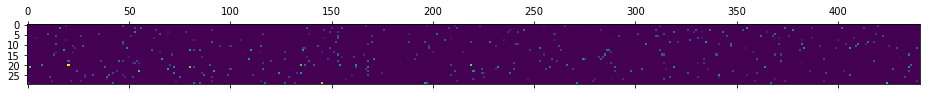

<Figure size 1080x216 with 0 Axes>

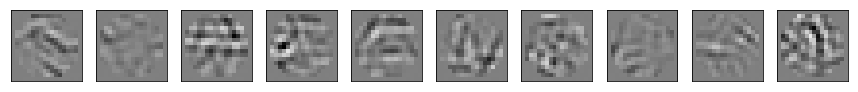

<Figure size 1080x216 with 0 Axes>

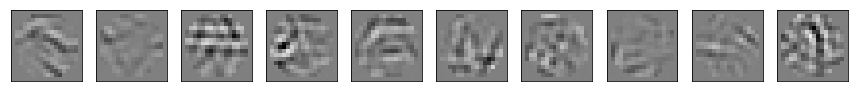

<Figure size 1080x216 with 0 Axes>

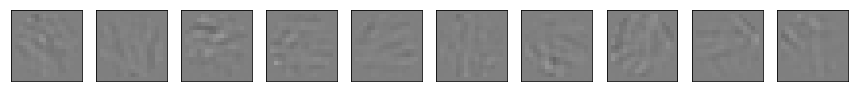

mean deviation of coefficients =  0.07362927076635767 0.02391443128863348 0.02222347059283864
mean deviation of coefficient errors =  0.005961662368430437
mean deviation of quantiles =  0.003133980001866618
mean deviation of quantiles =  0.0031023390597990992
total deviation of quantiles =  0.0005674411831843152
ratio deviation of quantiles =  0.18106088196042847
proba incorrect coefficients =  0.3570437615150227
proba incorrect coefficients (high) =  0.005221619897959218
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶  HEH  🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
sparse_code_bar


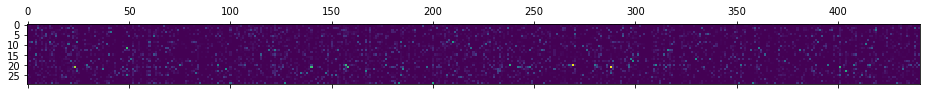

sparse_code_bar_high


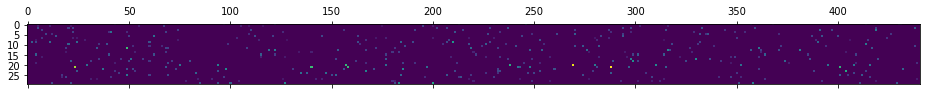

bar: average non-zeros [ 904 2421  713 1118 2570 1537 1925 3040 1900 2483 1669 2233 2288 2347
 2934  916  930 2449 1789 2474 1976 1360 1282 2992 2463 2165 1288  934
 1127 1448]
bar_high: average non-zeros [ 96 162  85 106 189 106 145 218 105 165 125 135 130 140 176  94 104 154
 124 165 120 100 131 203 167 153  95  98  90 118]
rec: average non-zeros [ 92 154 139 102 181 116 135 213 105 150 124 133 124 129 160  89 102 143
 127 163 125 103 128 201 177 152  91 140  89 126]


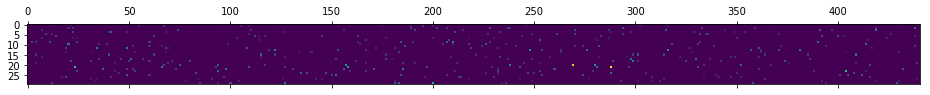

<Figure size 1080x216 with 0 Axes>

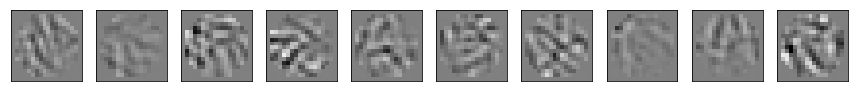

<Figure size 1080x216 with 0 Axes>

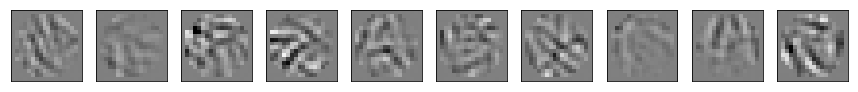

<Figure size 1080x216 with 0 Axes>

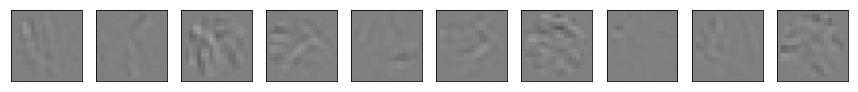

mean deviation of coefficients =  0.07485835108920678 0.023854371872456443 0.022284874720048836
mean deviation of coefficient errors =  0.0060062781464996565
mean deviation of quantiles =  0.003133643066813682
mean deviation of quantiles =  0.0031106239439853503
total deviation of quantiles =  0.00048476022035149604
ratio deviation of quantiles =  0.15469541680903845
proba incorrect coefficients =  0.3765761187287415
proba incorrect coefficients (high) =  0.004625385310374153


In [6]:
N_show = 30

def shuffling(data, sparse_code, dico, N_show=N_show):
    if do_random:
        from shl_scripts.shl_encode import inv_quantile, inv_rescaling
        sparse_code_bar = inv_rescaling(inv_quantile(dico.P_cum, np.random.rand(sparse_code.shape[0], sparse_code.shape[1])), C=shl.C)
    else:
        sparse_code = sparse_encode(data, dico.dictionary, P_cum=dico.P_cum, C=shl.C, 
                                     l0_sparseness=dico.n_dictionary, gain=None)   

        sparse_code_bar = sparse_code.copy()
        
        sparse_code_bar = sparse_code_bar.T
        np.random.shuffle(sparse_code_bar)
        sparse_code_bar = sparse_code_bar.T
        
    if do_double_shuffle:
        np.random.shuffle(sparse_code_bar)
    print('sparse_code_bar')
    plt.matshow(sparse_code_bar[:N_show, :])
    plt.show()

    def threshold_mask(sparse_code, l0_sparseness, n_dictionary):
        thr = np.percentile(sparse_code, 100 * (1 - l0_sparseness/n_dictionary), axis=1)
        return (sparse_code>thr[:, np.newaxis])

    sparse_code_bar_high = threshold_mask(sparse_code_bar, shl.l0_sparseness, shl.n_dictionary) * sparse_code_bar
    print('sparse_code_bar_high')
    plt.matshow(sparse_code_bar_high[:N_show, :])
    plt.show()
    return sparse_code_bar, sparse_code_bar_high

def pipeline(sparse_code_bar, sparse_code_bar_high, dico, index, N_show=N_show):

    if do_high:
        patches_bar = sparse_code_bar_high @ dico.dictionary
    else:
        patches_bar = sparse_code_bar @ dico.dictionary

        
    SD = np.sqrt(np.mean(patches_bar**2, axis=1))

    sparse_code_rec = sparse_encode(patches_bar, dico.dictionary, P_cum=dico.P_cum, C=shl.C, 
                                     l0_sparseness=shl.l0_sparseness, gain=None)   

    print('bar: average non-zeros', np.count_nonzero(sparse_code_bar, axis=0)[:N_show])
    print('bar_high: average non-zeros', np.count_nonzero(sparse_code_bar_high, axis=0)[:N_show])
    print('rec: average non-zeros', np.count_nonzero(sparse_code_rec, axis=0)[:N_show])
    
    from shl_scripts import print_stats
    SD, SE = print_stats(patches_bar, dico.dictionary, sparse_code_rec, verbose=False, display=True, N_show=N_show)
    #plt.matshow(sparse_code_rec[:N_show, :])
    plt.show()

    print('mean deviation of coefficients = ', np.mean(np.abs(sparse_code_bar)), np.mean(np.abs(sparse_code_bar_high)), np.mean(np.abs(sparse_code_rec)))
    print('mean deviation of coefficient errors = ', np.mean(np.abs(sparse_code_bar_high-sparse_code_rec)))

    from shl_scripts.shl_encode import quantile, rescaling

    q_rec = quantile(dico.P_cum, rescaling(sparse_code_rec, C=shl.C), stick, do_fast=False)
    q_bar = quantile(dico.P_cum, rescaling(sparse_code_bar_high, C=shl.C), stick, do_fast=False)

    print('mean deviation of quantiles = ', np.mean(np.abs(q_bar)))
    print('mean deviation of quantiles = ', np.mean(np.abs(q_rec)))
    print('total deviation of quantiles = ', np.mean(np.abs(q_bar-q_rec)))
    print('ratio deviation of quantiles = ', np.mean(np.abs(q_bar-q_rec))/np.mean(np.abs(q_bar)))
    aerror = np.mean(np.abs(q_bar-q_rec))/np.mean(np.abs(q_bar))

    perror = 1 - np.mean( (sparse_code_bar>0) == (sparse_code_rec>0))
    print('proba incorrect coefficients = ', perror)

    perror_high = 1 - np.mean( (sparse_code_bar_high > 0) == (sparse_code_rec>0))
    print('proba incorrect coefficients (high) = ', perror_high)
    
    return pd.DataFrame({'error':[(SD/SE).mean()],
                               'aerror':[aerror],
                               'perror':[perror],
                               'perror_high':[perror_high]
                                        },
                                index=[index])

record = None
for homeo_method in homeo_methods:
    print(42*'🐶')
    print(19*'🐶' + '  ' + homeo_method + '  ' + 19*'🐶')
    print(42*'🐶')

    shl = SHL(homeo_method=homeo_method)

    sparse_code_bar, sparse_code_bar_high = shuffling(data[indx, :], sparse_code, dico[homeo_method])
    record_ = pipeline(sparse_code_bar, sparse_code_bar_high, dico[homeo_method], index=homeo_method)
    if record is None:
        record = record_
    else:
        record = pd.concat((record, record_))


In [7]:
record

,aerror,error,perror,perror_high
None,0.466184,4.239715,0.279039,0.013198
HAP,0.181061,5.956170,0.357044,0.005222
HEH,0.154695,6.143211,0.376576,0.004625


## Version used

In [8]:
%load_ext version_information
%version_information numpy, shl_scripts, pandas

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.1)]
IPython 6.4.0
OS Darwin 17.5.0 x86_64 i386 64bit
numpy 1.14.3
shl_scripts 20171221
pandas 0.22.0
Fri May 11 16:43:17 2018 CEST